In [1]:
import pandas as pd

labels = pd.read_csv('./input/train.csv')
sumbssion = pd.read_csv('./input/sample_submission.csv')

In [2]:
labels.head()

,id,has_cactus
0,0004be2cfeaba1c0361d39e2b000257b.jpg,1
1,000c8a36845c0208e833c79c1bffedd1.jpg,1
2,000d1e9a533f62e55c289303b072733d.jpg,1
3,0011485b40695e9138e92d0b3fb55128.jpg,1
4,0014d7a11e90b62848904c1418fc8cf2.jpg,1


In [3]:
sumbssion.head()

,id,has_cactus
0,000940378805c44108d287872b2f04ce.jpg,0.5
1,0017242f54ececa4512b4d7937d1e21e.jpg,0.5
2,001ee6d8564003107853118ab87df407.jpg,0.5
3,002e175c3c1e060769475f52182583d0.jpg,0.5
4,0036e44a7e8f7218e9bc7bf8137e4943.jpg,0.5


타깃값 분포 파이그래프로 그려보자

([<matplotlib.patches.Wedge at 0x19f75829820>,
 [Text(-0.7793519565739233, 0.7762799287527649, 'Has cactus'),
  Text(0.7793519929142084, -0.776279892268666, "Hasn't cactus")],
 [Text(-0.4251010672221399, 0.42342541568332626, '75.1%'),
  Text(0.42510108704411365, -0.42342539578290866, '24.9%')])

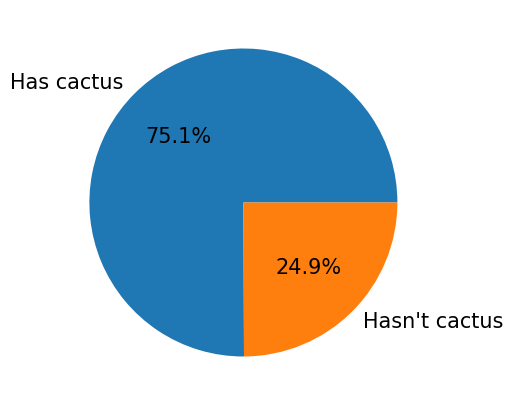

In [10]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

mpl.rc('font', size=15)
plt.figure(figsize=(5,5))

# 타깃값 레이블
label = ['Has cactus','Hasn\'t cactus'] 
# 타깃값 분포 파이 그래프
plt.pie(labels['has_cactus'].value_counts(), labels=label, autopct='%.1f%%')

In [12]:
import os 

num_train = len(os.listdir('./input/train'))
num_test = len(os.listdir('./input/test/'))

print(f'훈련 데이터 개수 : {num_train}')
print(f'테스트 데이터 개수 ; {num_test}')

훈련 데이터 개수 : 17500
테스트 데이터 개수 ; 4000


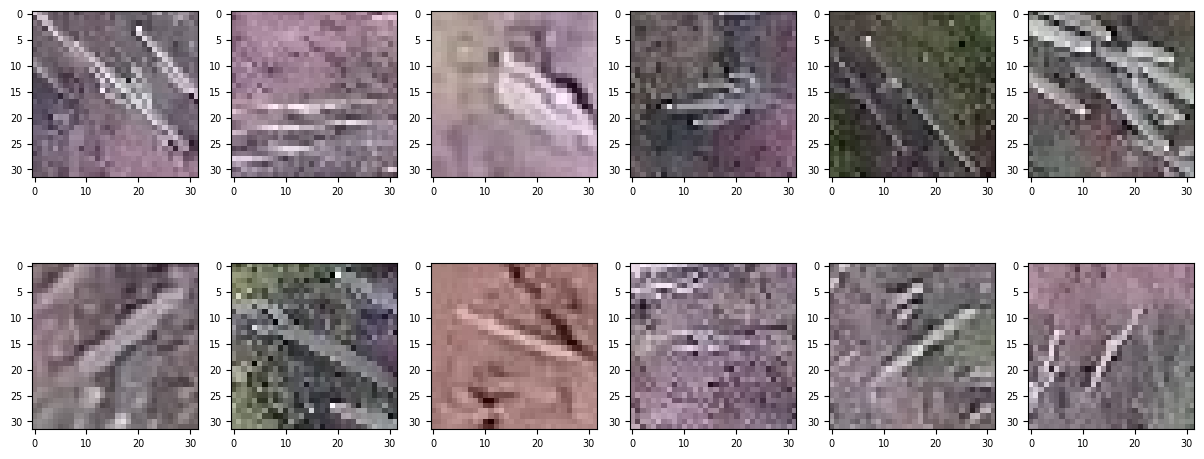

In [13]:
import matplotlib.gridspec as gridspec
import cv2

mpl.rc('font', size=7)
plt.figure(figsize=(15, 6))
grid = gridspec.GridSpec(2, 6)

# 선인장을 포함하는 이미지 파일명(마지막 12개)
last_has_cactus_img_name = labels[labels['has_cactus']==1]['id'][-12:]

# 이미지 출력
for idx, img_name in enumerate(last_has_cactus_img_name):
    img_path = './input/train/' + img_name # 이미지 파일 경로
    image = cv2.imread(img_path) #  이미지 파일 읽기
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # 이미지 색상 보정
    ax = plt.subplot(grid[idx])
    ax.imshow(image)

이제 선인장을 포함하지 않는 이미지 출력해보자

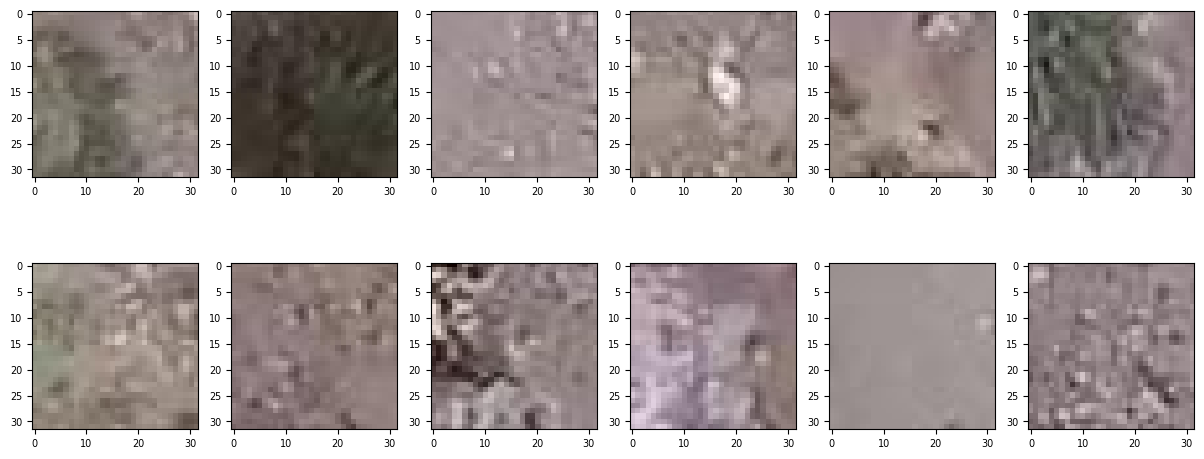

In [16]:
plt.figure(figsize=(15, 6)) # 전체 Figure 크기 설정
grid = gridspec.GridSpec(2, 6) # 서브플롯 배치
last_hasnt_cactus_img_name = labels[labels['has_cactus']==0]['id'][-12:]

# 선인장을 포함하지 않는 이미지 파일명(마지막 12개)
for idx, img_name in enumerate(last_hasnt_cactus_img_name):
    img_path = './input/train/' + img_name
    image = cv2.imread(img_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    ax = plt.subplot(grid[idx])
    ax.imshow(image)

In [17]:
image.shape

(32, 32, 3)